 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Convert-targets-to-categorical" data-toc-modified-id="Convert-targets-to-categorical-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Convert targets to categorical</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Assign-observations-to-bins,-part-1:-Always-to-the-left" data-toc-modified-id="Assign-observations-to-bins,-part-1:-Always-to-the-left-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assign observations to bins, part 1: Always to the left</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Assign-observations-to-bins,-part-2:-Nearest-edge" data-toc-modified-id="Assign-observations-to-bins,-part-2:-Nearest-edge-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Assign observations to bins, part 2: Nearest edge</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Are-we-overfitting?" data-toc-modified-id="Are-we-overfitting?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Are we overfitting?</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Bin-size-tuning" data-toc-modified-id="Bin-size-tuning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Bin size tuning</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#How-complex-does-a-network-have-to-be-to-produce-a-clean-PDF" data-toc-modified-id="How-complex-does-a-network-have-to-be-to-produce-a-clean-PDF-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>How complex does a network have to be to produce a clean PDF</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Convert-to-relative-bins" data-toc-modified-id="Convert-to-relative-bins-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Convert to relative bins</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Full-ensemble-features" data-toc-modified-id="Full-ensemble-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full ensemble features</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#With-convolution" data-toc-modified-id="With-convolution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>With convolution</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Full-ensemble-with-mean-and-std-output" data-toc-modified-id="Full-ensemble-with-mean-and-std-output-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Full ensemble with mean and std output</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#With-station-embeddings" data-toc-modified-id="With-station-embeddings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>With station embeddings</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#With-relative-bins" data-toc-modified-id="With-relative-bins-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>With relative bins</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#With-full-ensemble-input" data-toc-modified-id="With-full-ensemble-input-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>With full ensemble input</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Standard-bins" data-toc-modified-id="Standard-bins-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Standard bins</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#testing-a-convolution-layer" data-toc-modified-id="testing-a-convolution-layer-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>testing a convolution layer</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Auxiliary-data" data-toc-modified-id="Auxiliary-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Auxiliary data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Mean-and-std" data-toc-modified-id="Mean-and-std-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mean and std</a></span></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#Full-ensemble" data-toc-modified-id="Full-ensemble-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Full ensemble</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/nn_postprocessing/categorical_networks.ipynb#XGBoost" data-toc-modified-id="XGBoost-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></div>

# Categorical/binned output 

Here we will use categorical output instead of the mean and standard deviation.


In [97]:
# Imports
from importlib import reload
import utils; reload(utils)
from utils import *
import losses; reload(losses)
from losses import approx_crps_cat, approx_crps_cat, crps_cost_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict

import keras
from keras.layers import Input, Dense, merge, Embedding, Flatten, Dropout
from keras.layers.merge import Concatenate
from keras.models import Model
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from scipy.stats import binned_statistic

Anaconda environment: py36_keras
Darwin 17.2.0


In [4]:
# Setup
DATA_DIR = '/Volumes/STICK/data/ppnn_data/'  # Mac
# DATA_DIR = '/project/meteo/w2w/C7/ppnn_data/'   # LMU
fclt = 48

## Convert targets to categorical

We will one-hot-encode the target array

In [98]:
train_dates = ['2010-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']
train_set, test_set = get_train_test_sets(DATA_DIR, train_dates, test_dates)

train set contains 2191 days
test set contains 366 days


In [86]:
# Define the bins
bin_width = 0.5
bin_edges = np.arange(-30, 35 + bin_width, bin_width)
bin_edges.shape

(131,)

### Assign observations to bins, part 1: Always to the left

In [7]:
def convert_targets(targets, bin_edges):
    bin_idxs = binned_statistic(targets, targets, bins=bin_edges)[-1]
    return keras.utils.to_categorical(bin_idxs, num_classes=bin_edges.shape[0]-1)

In [8]:
train_cat_targets = convert_targets(train_set.targets, bin_edges)
test_cat_targets = convert_targets(test_set.targets, bin_edges)

Obs: 4.3


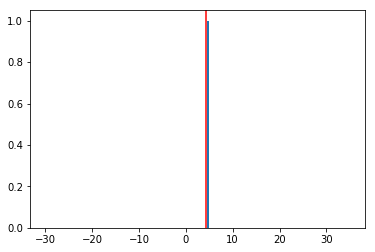

In [9]:
print('Obs:', test_set.targets[0])
plt.bar(bin_edges[:-1] + 0.25, test_cat_targets[0], width=0.5, zorder=0.1)
plt.axvline(test_set.targets[0], c='r')
plt.show()

In [10]:
def build_cat_model(n_features, hidden_nodes, n_bins):
    inp = Input(shape=(n_features,))
    x = Dense(hidden_nodes[0], activation='relu')(inp)
    if len(hidden_nodes) > 1:
        for h in hidden_nodes[1:]:
            x = Dense(h, activation='relu')(x)
    x = Dense(n_bins, activation='softmax')(x)
    return Model(inputs=inp, outputs=x)

In [12]:
model = build_cat_model(2, [50], bin_edges.shape[0]-1)

In [15]:
model.compile(optimizer=Adam(0.01), loss=approx_crps_cat(bin_width))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 130)               6630      
Total params: 6,780
Trainable params: 6,780
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.optimizer.lr = 1e-4

In [20]:
model.fit(train_set.features, train_cat_targets, epochs=5, batch_size=4096,
          validation_data=[test_set.features, test_cat_targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/5
180849/180849 [==============================] - 5s - loss: 1.1162 - val_loss: 1.0823
Epoch 2/5
180849/180849 [==============================] - 5s - loss: 1.1137 - val_loss: 1.0776
Epoch 3/5
180849/180849 [==============================] - 5s - loss: 1.1119 - val_loss: 1.0756
Epoch 4/5
180849/180849 [==============================] - 5s - loss: 1.1118 - val_loss: 1.0744
Epoch 5/5
180849/180849 [==============================] - 7s - loss: 1.1103 - val_loss: 1.0712


In [21]:
preds = model.predict(test_set.features)

In [22]:
# Get correct CRPS
maybe_correct_cat_crps(preds, test_set.targets, bin_edges)

1.1210157083616799

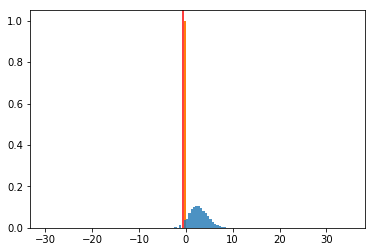

In [24]:
i = 10
plt.bar(bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
plt.bar(bin_edges[:-1] + 0.25, test_cat_targets[i], width=0.5, zorder=0.1)
plt.axvline(test_set.targets[i], c='r')
plt.show()

### Assign observations to bins, part 2: Nearest edge

In [87]:
def convert_targets_nearest(targets, bin_edges):
    mat_bin_edges = np.repeat(np.atleast_2d(bin_edges), targets.shape[0], axis=0).T
    bin_idxs = np.argmin(np.abs(mat_bin_edges - targets),axis=0)
    return keras.utils.to_categorical(bin_idxs, num_classes=bin_edges.shape[0]-1)

In [88]:
train_cat_targets_nearest = convert_targets_nearest(train_set.targets, bin_edges)
test_cat_targets_nearest = convert_targets_nearest(test_set.targets, bin_edges)

In [89]:
model = build_cat_model(2, [50], bin_edges.shape[0]-1)

In [90]:
model.compile(optimizer=Adam(0.01), loss=approx_crps_cat(bin_width))

In [33]:
model.optimizer.lr = 1e-4

In [91]:
model.fit(train_set.features, train_cat_targets_nearest, epochs=5, batch_size=1024,
          validation_data=[test_set.features, test_cat_targets_nearest])

Train on 1092828 samples, validate on 182218 samples
Epoch 1/5
1092828/1092828 [==============================] - 27s - loss: 1.1946 - val_loss: 1.0314
Epoch 2/5
1092828/1092828 [==============================] - 26s - loss: 1.0760 - val_loss: 1.0246
Epoch 3/5
1092828/1092828 [==============================] - 27s - loss: 1.0749 - val_loss: 1.0405
Epoch 4/5
 187392/1092828 [====>.........................] - ETA: 22s - loss: 1.0716

KeyboardInterrupt: 

In [92]:
preds = model.predict(test_set.features)

In [93]:
maybe_correct_cat_crps(preds, test_set.targets, bin_edges)

1.0473333141037027

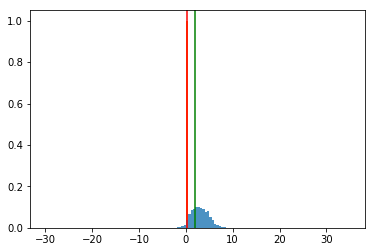

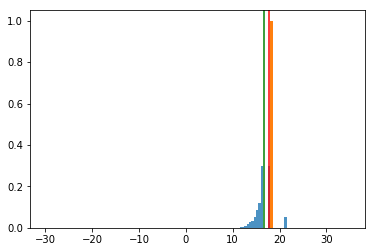

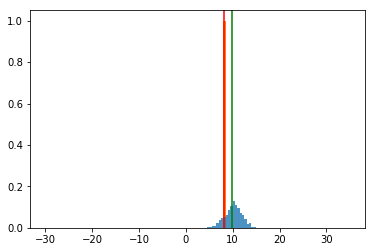

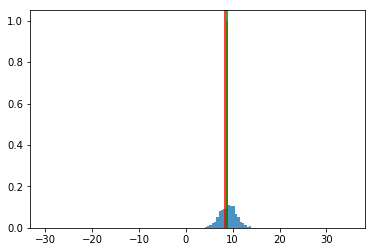

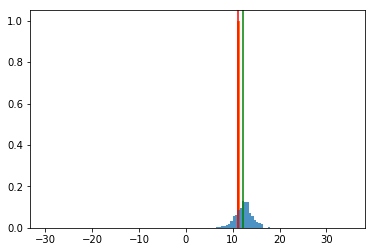

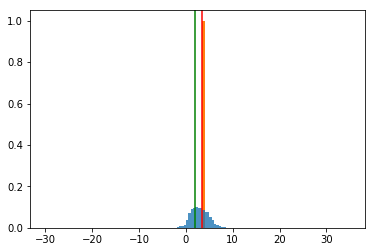

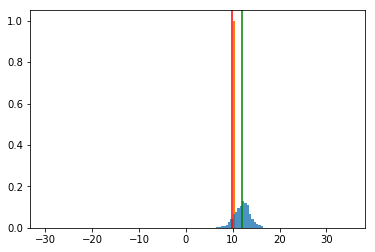

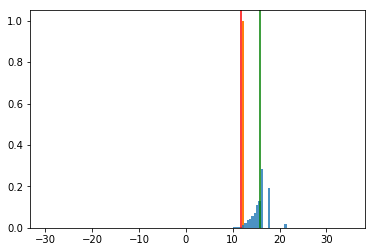

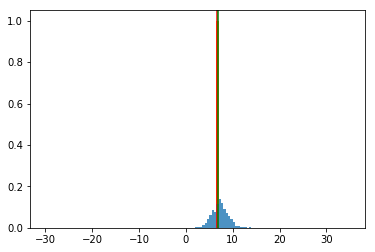

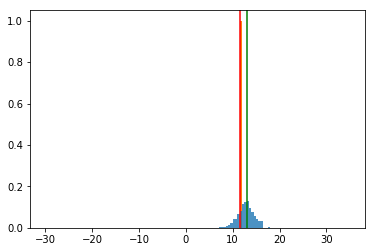

In [103]:
for i in np.random.randint(0, 182218, 10):
    plt.bar(bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
    plt.bar(bin_edges[:-1] + 0.25, test_cat_targets_nearest[i], width=0.5, zorder=0.1)
    plt.axvline(test_set.targets[i], c='r')
    plt.axvline(test_set.features[i, 0] * test_set.scale_factors[0], c='g')
    plt.show()

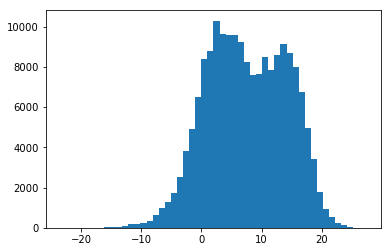

In [101]:
plt.hist(test_set.targets, bins = 50);

### Are we overfitting?

In [43]:
model = build_cat_model(2, [50], bin_edges.shape[0]-1)
model.compile(optimizer=Adam(0.01), loss=approx_crps_cat(bin_width))

In [45]:
model.fit(train_set.features, train_cat_targets_nearest, epochs=5, batch_size=1024,
              validation_split=0.2)

Train on 144679 samples, validate on 36170 samples
Epoch 1/5
144679/144679 [==============================] - 3s - loss: 1.1115 - val_loss: 1.1108
Epoch 2/5
144679/144679 [==============================] - 3s - loss: 1.1097 - val_loss: 1.1187
Epoch 3/5
144679/144679 [==============================] - 3s - loss: 1.1092 - val_loss: 1.1148
Epoch 4/5
144679/144679 [==============================] - 3s - loss: 1.1105 - val_loss: 1.1353
Epoch 5/5
144679/144679 [==============================] - 4s - loss: 1.1095 - val_loss: 1.1421


Only at the end, try a more complex model.

In [49]:
model = build_cat_model(2, [500, 500], bin_edges.shape[0]-1)
model.compile(optimizer=Adam(0.01), loss=approx_crps_cat(bin_width))

In [50]:
model.fit(train_set.features, train_cat_targets_nearest, epochs=5, batch_size=1024,
              validation_split=0.2)

Train on 144679 samples, validate on 36170 samples
Epoch 1/5
144679/144679 [==============================] - 16s - loss: 1.3433 - val_loss: 1.3339
Epoch 2/5
144679/144679 [==============================] - 15s - loss: 1.1372 - val_loss: 1.1312
Epoch 3/5
144679/144679 [==============================] - 15s - loss: 1.1271 - val_loss: 1.0937
Epoch 4/5
144679/144679 [==============================] - 15s - loss: 1.1054 - val_loss: 1.1512
Epoch 5/5
144679/144679 [==============================] - 17s - loss: 1.0943 - val_loss: 1.1259


### Bin size tuning

In [241]:
wide_bin_width = 1.5
wide_bin_edges = np.arange(-30, 35 + wide_bin_width, wide_bin_width)

In [242]:
wide_train_cat_targets = convert_targets_nearest(train_set.targets, wide_bin_edges)
wide_test_cat_targets = convert_targets_nearest(test_set.targets, wide_bin_edges)

In [243]:
model = build_cat_model(2, [50], wide_bin_edges.shape[0]-1)

In [244]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_61 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_62 (Dense)             (None, 44)                2244      
Total params: 2,394
Trainable params: 2,394
Non-trainable params: 0
_________________________________________________________________


In [253]:
model.compile(optimizer=Adam(0.0001), loss=approx_crps)

In [254]:
model.fit(train_set.features, wide_train_cat_targets, epochs=5, batch_size=1024,
          validation_data=[test_set.features, wide_test_cat_targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/5
180849/180849 [==============================] - 2s - loss: 0.4007 - val_loss: 0.3866
Epoch 2/5
180849/180849 [==============================] - 2s - loss: 0.4000 - val_loss: 0.3857
Epoch 3/5
180849/180849 [==============================] - 2s - loss: 0.3994 - val_loss: 0.3850
Epoch 4/5
180849/180849 [==============================] - 2s - loss: 0.3988 - val_loss: 0.3844
Epoch 5/5
180849/180849 [==============================] - 2s - loss: 0.3983 - val_loss: 0.3841


In [255]:
preds = model.predict(test_set.features)

In [69]:
i = 100447
plt.bar(wide_bin_edges[:-1] + 0.75, preds[i], width=1.5, alpha=0.8)
plt.bar(wide_bin_edges[:-1] + 0.75, wide_test_cat_targets[i], width=1.5, zorder=0.1)
plt.axvline(test_set.targets[i], c='r')
plt.show()

NameError: name 'wide_bin_edges' is not defined

In [257]:
maybe_correct_cat_crps(preds, test_set.targets, wide_bin_edges)

1.2046557611208457

### How complex does a network have to be to produce a clean PDF

In [54]:
preds[:, 1].mean()

2.2552676e-08

In [57]:
# Create dummy dataset of means and stds
dummy_means = np.random.rand(100000) * 40. + 5
dummy_std = np.random.rand(100000) * 3.

In [58]:
# Create the corresponding PDFs in bins
dummy_bin_edges = np.arange(0, 50 + bin_width, bin_width)

### Convert to relative bins

In [114]:
mean_error = test_set.features[:, 0] * test_set.scale_factors[0] - test_set.targets

In [115]:
mean_error.min(), mean_error.max()

(-13.662431, 19.809189)

In [116]:
mean_error.argmin()

162412

In [117]:
np.mean(np.abs(mean_error))

1.4406393

In [118]:
train_conv_targets = train_set.targets - train_set.features[:, 0] * train_set.scale_factors[0]
test_conv_targets = test_set.targets - test_set.features[:, 0] * test_set.scale_factors[0]

In [120]:
train_conv_targets.min(), train_conv_targets.max()

(-13.174971, 16.22398)

In [121]:
conv_bin_edges = np.arange(-15, 20 + bin_width, bin_width)

In [122]:
conv_train_cat_targets_nearest = convert_targets_nearest(train_conv_targets, conv_bin_edges)
conv_test_cat_targets_nearest = convert_targets_nearest(test_conv_targets, conv_bin_edges)

In [123]:
model = build_cat_model(2, [50], conv_bin_edges.shape[0]-1)
model.compile(optimizer=Adam(0.01), loss=approx_crps_cat(bin_width))

In [124]:
model.fit(train_set.features, conv_train_cat_targets_nearest, epochs=5, batch_size=1024,
          validation_data=[test_set.features, conv_test_cat_targets_nearest])

Train on 1092828 samples, validate on 182218 samples
Epoch 1/5
1092828/1092828 [==============================] - 17s - loss: 1.0699 - val_loss: 1.0088
Epoch 2/5
1092828/1092828 [==============================] - 16s - loss: 1.0445 - val_loss: 1.0160
Epoch 3/5
1092828/1092828 [==============================] - 16s - loss: 1.0440 - val_loss: 1.0072
Epoch 4/5
1092828/1092828 [==============================] - 16s - loss: 1.0436 - val_loss: 1.0215
Epoch 5/5
1092828/1092828 [==============================] - 16s - loss: 1.0434 - val_loss: 1.0186


In [125]:
preds = model.predict(test_set.features)

In [126]:
maybe_correct_cat_crps(preds, test_conv_targets, conv_bin_edges)

1.0511612930624885

69598
12.1 10.2448


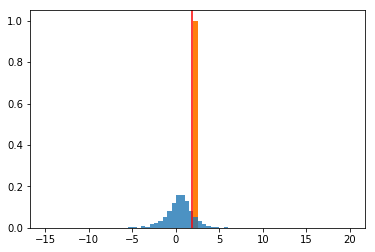

26259
6.9 6.52055


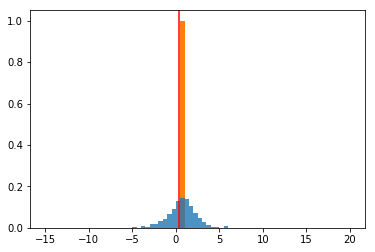

127710
20.8 20.3243


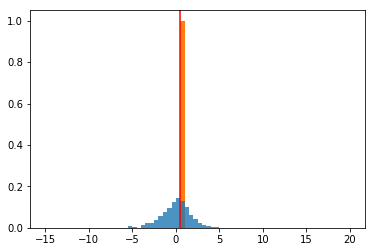

38035
-3.2 -0.0233978


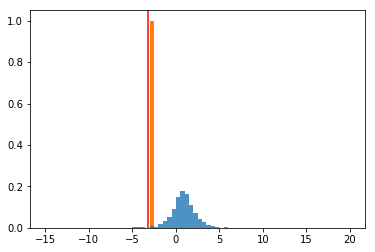

143127
2.0 6.13449


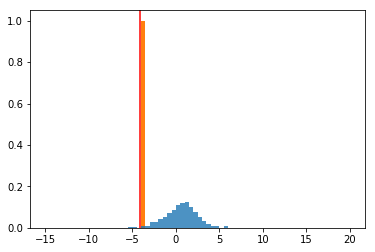

32744
0.8 1.60835


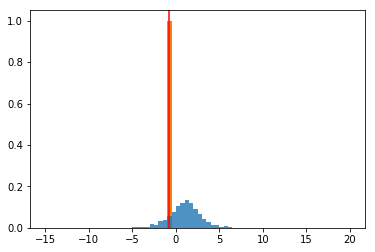

55777
8.4 7.39353


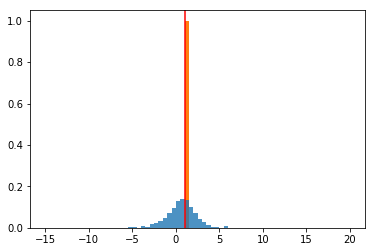

171743
4.6 0.255672


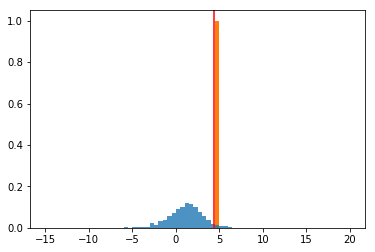

134850
9.2 10.5802


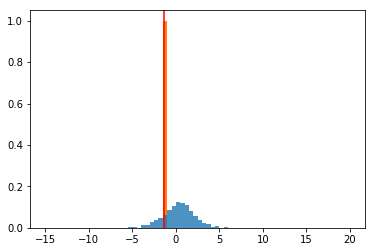

179564
7.9 7.09409


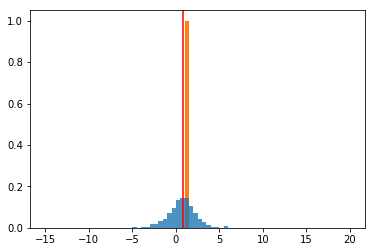

In [128]:
for i in np.random.randint(0, 182218, 10):
    print(i)
    print(test_set.targets[i], test_set.features[i, 0] * test_set.scale_factors[0])
    plt.bar(conv_bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
    plt.bar(conv_bin_edges[:-1] + 0.25, conv_test_cat_targets_nearest[i], width=0.5, zorder=0.1)
    plt.axvline(test_conv_targets[i], c='r')
    plt.show()

## Full ensemble features

In [62]:
train_set_full_ens, test_set_full_ens = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                                            full_ensemble_t=True)

train set contains 365 days
test set contains 366 days


In [64]:
train_set_full_ens.features.shape

(180849, 50)

In [181]:
model = build_cat_model(50, [50], bin_edges.shape[0]-1)

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 50)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_50 (Dense)             (None, 130)               6630      
Total params: 9,180
Trainable params: 9,180
Non-trainable params: 0
_________________________________________________________________


In [185]:
model.compile(optimizer=Adam(0.0001), loss=approx_crps)

In [186]:
model.fit(train_set_full_ens.features, train_cat_targets_nearest, epochs=10, batch_size=1024,
          validation_data=[test_set_full_ens.features, test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 3s - loss: 1.1662 - val_loss: 1.1399
Epoch 2/10
180849/180849 [==============================] - 3s - loss: 1.1656 - val_loss: 1.1393
Epoch 3/10
180849/180849 [==============================] - 3s - loss: 1.1651 - val_loss: 1.1394
Epoch 4/10
180849/180849 [==============================] - 3s - loss: 1.1646 - val_loss: 1.1383
Epoch 5/10
180849/180849 [==============================] - 3s - loss: 1.1641 - val_loss: 1.1380
Epoch 6/10
180849/180849 [==============================] - 3s - loss: 1.1637 - val_loss: 1.1378
Epoch 7/10
180849/180849 [==============================] - 3s - loss: 1.1632 - val_loss: 1.1371
Epoch 8/10
180849/180849 [==============================] - 3s - loss: 1.1628 - val_loss: 1.1367
Epoch 9/10
180849/180849 [==============================] - 3s - loss: 1.1625 - val_loss: 1.1362
Epoch 10/10
180849/180849 [==============================] - 3s - loss: 1.1

In [187]:
preds = model.predict(test_set_full_ens.features)

In [188]:
maybe_correct_cat_crps(preds, test_set.targets, bin_edges)

1.1306173910191841

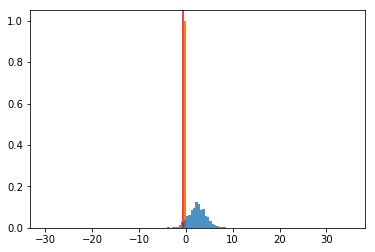

In [189]:
i = 10
plt.bar(bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
plt.bar(bin_edges[:-1] + 0.25, test_cat_targets[i], width=0.5, zorder=0.1)
plt.axvline(test_set.targets[i], c='r')
plt.show()

### With convolution

In [190]:
def build_cat_conv_model(hidden_nodes, feature_size, n_bins, maps):
    features_in = Input(shape=(feature_size, 1))
    conv = Conv1D(maps, feature_size)(features_in)
    conv = Flatten()(conv)
    x = Dense(hidden_nodes, activation='relu')(conv)
    x = Dense(n_bins, activation='softmax')(x)
    model = Model(inputs=features_in, outputs=x)
    return model

In [200]:
model = build_cat_conv_model(50, 50, bin_edges.shape[0]-1, 10)

In [201]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 50, 1)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1, 10)             510       
_________________________________________________________________
flatten_13 (Flatten)         (None, 10)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_56 (Dense)             (None, 130)               6630      
Total params: 7,690
Trainable params: 7,690
Non-trainable params: 0
_________________________________________________________________


In [204]:
model.compile(optimizer=Adam(0.0001), loss=approx_crps)

In [205]:
model.fit(np.atleast_3d(train_set_full_ens.features), train_cat_targets_nearest, 
          epochs=10, batch_size=1024,
          validation_data=[np.atleast_3d(test_set_full_ens.features), test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 4s - loss: 1.1959 - val_loss: 1.1233
Epoch 2/10
180849/180849 [==============================] - 3s - loss: 1.1956 - val_loss: 1.1215
Epoch 3/10
180849/180849 [==============================] - 3s - loss: 1.1956 - val_loss: 1.1217
Epoch 4/10
180849/180849 [==============================] - 3s - loss: 1.1956 - val_loss: 1.1225
Epoch 5/10
180849/180849 [==============================] - 3s - loss: 1.1934 - val_loss: 1.1185
Epoch 6/10
180849/180849 [==============================] - 3s - loss: 1.1890 - val_loss: 1.1168
Epoch 7/10
180849/180849 [==============================] - 3s - loss: 1.1887 - val_loss: 1.1178
Epoch 8/10
180849/180849 [==============================] - 3s - loss: 1.1885 - val_loss: 1.1171
Epoch 9/10
180849/180849 [==============================] - 3s - loss: 1.1884 - val_loss: 1.1167
Epoch 10/10
180849/180849 [==============================] - 3s - loss: 1.1

### Full ensemble with mean and std output

In [113]:
def build_hidden_model(hidden_nodes, feature_size=2):
    inp = Input(shape=(feature_size,))
    x = Dense(hidden_nodes, activation='relu')(inp)
    x = Dense(2, activation='linear')(x)
    return Model(inputs=inp, outputs=x)

In [114]:
model = build_hidden_model(50, 50)
model.compile(optimizer=Adam(0.01), loss=crps_cost_function)

In [115]:
model.fit(train_set_full_ens.features, train_set_full_ens.targets, epochs=5, 
                 batch_size=1024,
                 validation_data=[test_set_full_ens.features, test_set_full_ens.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/5
180849/180849 [==============================] - 1s - loss: 1.4411 - val_loss: 1.0460
Epoch 2/5
180849/180849 [==============================] - 1s - loss: 1.0766 - val_loss: 1.0239
Epoch 3/5
180849/180849 [==============================] - 1s - loss: 1.0731 - val_loss: 1.0242
Epoch 4/5
180849/180849 [==============================] - 1s - loss: 1.0711 - val_loss: 1.0422
Epoch 5/5
180849/180849 [==============================] - 1s - loss: 1.0709 - val_loss: 1.0318


In [116]:
preds = model.predict(test_set_full_ens.features)

In [118]:
preds[10], test_set_full_ens.targets[10]

(array([ 2.14922285, -1.70540333], dtype=float32), -0.60000002)

## With station embeddings

In [129]:
def build_cat_emb_model(hidden_nodes, emb_size, max_id, feature_size, n_bins):
    features_in = Input(shape=(feature_size,))
    id_in = Input(shape=(1,))
    emb = Embedding(max_id + 1, emb_size)(id_in)
    emb = Flatten()(emb)
    x = Concatenate()([features_in, emb])
    x = Dense(hidden_nodes, activation='relu')(x)
    x = Dense(n_bins, activation='softmax')(x)
    model = Model(inputs=[features_in, id_in], outputs=x)
    return model

In [130]:
emb_size = 5
max_id = int(np.max([train_set.cont_ids.max(), test_set.cont_ids.max()]))
max_id

536

### With relative bins

In [131]:
model = build_cat_emb_model(100, emb_size, max_id, 2, conv_bin_edges.shape[0]-1)

In [132]:
model.compile(optimizer=Adam(0.001), loss=approx_crps_cat(bin_width))

In [133]:
model.fit([train_set.features, train_set.cont_ids], conv_train_cat_targets_nearest, 
              epochs=5, batch_size=1024, 
              validation_data=[[test_set.features, test_set.cont_ids], conv_test_cat_targets_nearest])

Train on 1092828 samples, validate on 182218 samples
Epoch 1/5
1092828/1092828 [==============================] - 20s - loss: 1.0948 - val_loss: 0.9109
Epoch 2/5
1092828/1092828 [==============================] - 19s - loss: 0.9418 - val_loss: 0.9069
Epoch 3/5
1092828/1092828 [==============================] - 19s - loss: 0.9391 - val_loss: 0.9057
Epoch 4/5
1092828/1092828 [==============================] - 19s - loss: 0.9374 - val_loss: 0.9071
Epoch 5/5
1092828/1092828 [==============================] - 19s - loss: 0.9358 - val_loss: 0.9071


In [134]:
preds = model.predict([test_set.features, test_set.cont_ids])

In [135]:
maybe_correct_cat_crps(preds, test_conv_targets, conv_bin_edges)

0.93468747827570597

22414
2.0 1.32883


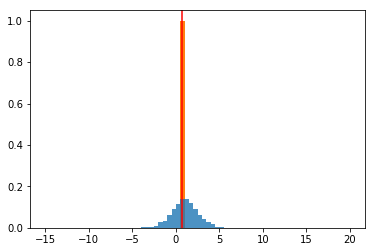

12547
1.3 -0.955767


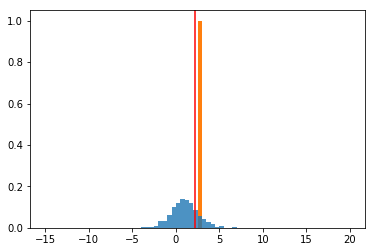

18650
9.9 8.75629


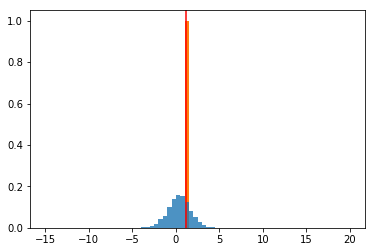

14403
1.6 1.57018


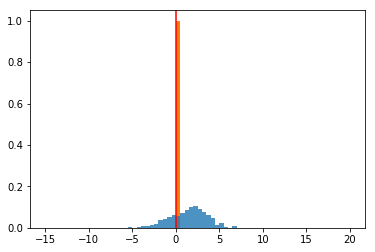

29467
-1.0 0.0790331


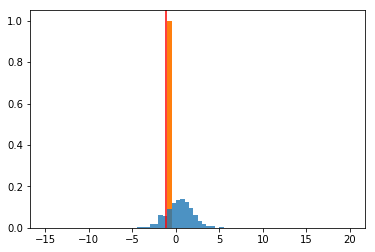

159501
3.5 3.59646


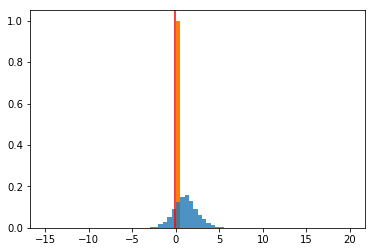

33520
-2.8 -2.84231


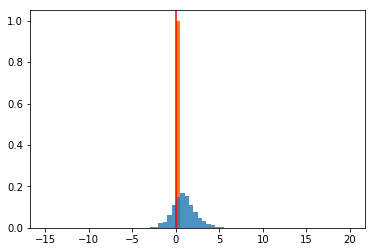

14755
1.3 2.12982


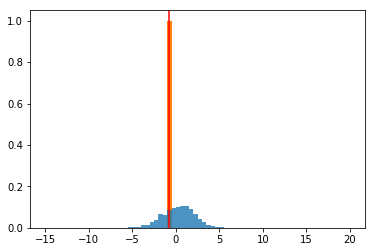

139630
8.5 10.2912


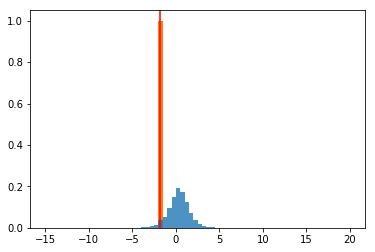

39821
3.0 1.32466


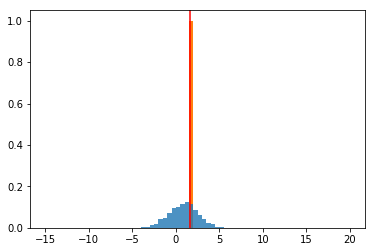

In [136]:
for i in np.random.randint(0, 182218, 10):
    print(i)
    print(test_set.targets[i], test_set.features[i, 0] * test_set.scale_factors[0])
    plt.bar(conv_bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
    plt.bar(conv_bin_edges[:-1] + 0.25, conv_test_cat_targets_nearest[i], width=0.5, zorder=0.1)
    plt.axvline(test_conv_targets[i], c='r')
    plt.show()

### With full ensemble input

In [137]:
train_set_full_ens, test_set_full_ens = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                                            full_ensemble_t=True)

train set contains 2191 days
test set contains 366 days


In [138]:
model = build_cat_emb_model(100, emb_size, max_id, 50, conv_bin_edges.shape[0]-1)

In [139]:
model.compile(optimizer=Adam(0.001), loss=approx_crps_cat(bin_width))

In [141]:
model.fit([train_set_full_ens.features, train_set_full_ens.cont_ids], conv_train_cat_targets_nearest, 
              epochs=3, batch_size=1024, 
              validation_data=[[test_set_full_ens.features, test_set_full_ens.cont_ids], 
                               conv_test_cat_targets_nearest])

Train on 1092828 samples, validate on 182218 samples
Epoch 1/3
1092828/1092828 [==============================] - 21s - loss: 1.0665 - val_loss: 0.9268
Epoch 2/3
1092828/1092828 [==============================] - 21s - loss: 0.9519 - val_loss: 0.9114
Epoch 3/3
1092828/1092828 [==============================] - 22s - loss: 0.9474 - val_loss: 0.9115


In [142]:
preds = model.predict([test_set_full_ens.features, test_set_full_ens.cont_ids])

In [143]:
maybe_correct_cat_crps(preds, test_conv_targets, conv_bin_edges)

0.93664919338451591

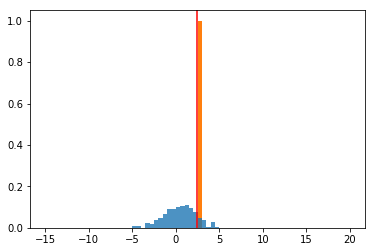

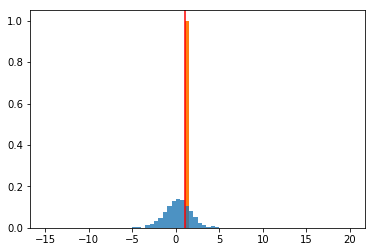

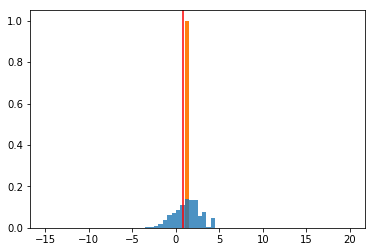

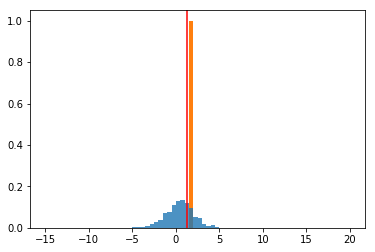

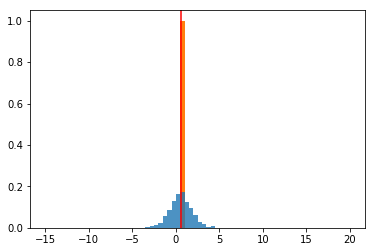

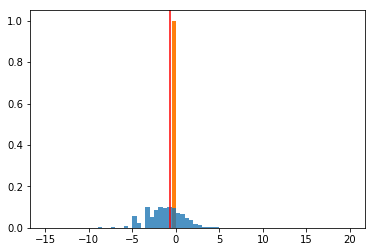

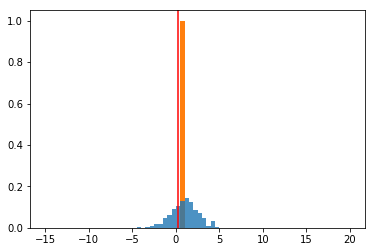

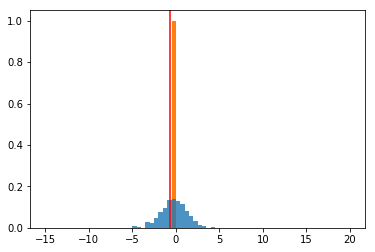

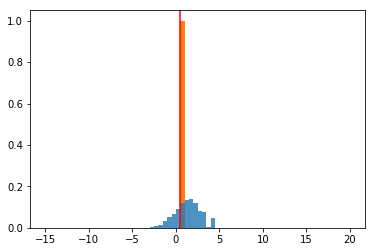

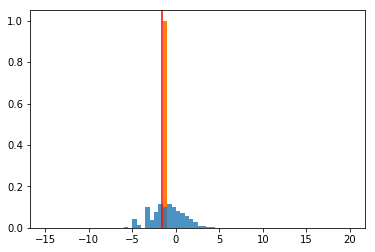

In [144]:
for i in np.random.randint(0, 182218, 10):
    plt.bar(conv_bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
    plt.bar(conv_bin_edges[:-1] + 0.25, conv_test_cat_targets_nearest[i], width=0.5, zorder=0.1)
    plt.axvline(test_conv_targets[i], c='r')
    plt.show()

### Standard bins

In [135]:
model = build_cat_emb_model(100, emb_size, max_id, 2, bin_edges.shape[0]-1)

In [147]:
model.compile(optimizer=Adam(0.00001), loss=approx_crps)

In [148]:
model.fit([train_set.features, train_set.cont_ids], train_cat_targets_nearest, 
              epochs=10, batch_size=4096, 
              validation_data=[[test_set.features, test_set.cont_ids], test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 3s - loss: 0.9701 - val_loss: 0.9442
Epoch 2/10
180849/180849 [==============================] - 2s - loss: 0.9701 - val_loss: 0.9441
Epoch 3/10
180849/180849 [==============================] - 2s - loss: 0.9701 - val_loss: 0.9440
Epoch 4/10
180849/180849 [==============================] - 2s - loss: 0.9700 - val_loss: 0.9440
Epoch 5/10
180849/180849 [==============================] - 2s - loss: 0.9700 - val_loss: 0.9439
Epoch 6/10
180849/180849 [==============================] - 2s - loss: 0.9700 - val_loss: 0.9439
Epoch 7/10
180849/180849 [==============================] - 2s - loss: 0.9700 - val_loss: 0.9438
Epoch 8/10
180849/180849 [==============================] - 2s - loss: 0.9700 - val_loss: 0.9438
Epoch 9/10
180849/180849 [==============================] - 2s - loss: 0.9700 - val_loss: 0.9437
Epoch 10/10
180849/180849 [==============================] - 2s - loss: 0.9

In [149]:
preds = model.predict([test_set.features, test_set.cont_ids])

In [150]:
maybe_correct_cat_crps(preds, test_set.targets, bin_edges)

0.95332045387173248

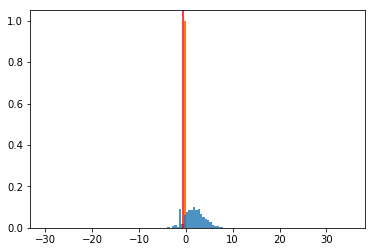

In [151]:
i = 10
plt.bar(bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8)
plt.bar(bin_edges[:-1] + 0.25, test_cat_targets[i], width=0.5, zorder=0.1)
plt.axvline(test_set.targets[i], c='r')
plt.show()

### testing a convolution layer

In [153]:
from keras.layers import Conv1D

In [158]:
def build_cat_emb_conv_model(hidden_nodes, emb_size, max_id, feature_size, n_bins, maps):
    features_in = Input(shape=(feature_size, 1))
    id_in = Input(shape=(1,))
    emb = Embedding(max_id + 1, emb_size)(id_in)
    emb = Flatten()(emb)
    conv = Conv1D(maps, feature_size)(features_in)
    conv = Flatten()(conv)
    x = Concatenate()([conv, emb])
    x = Dense(hidden_nodes, activation='relu')(x)
    x = Dense(n_bins, activation='softmax')(x)
    model = Model(inputs=[features_in, id_in], outputs=x)
    return model

In [161]:
model = build_cat_emb_conv_model(100, emb_size, max_id, 50, bin_edges.shape[0]-1, 2)

In [162]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_27 (InputLayer)            (None, 50, 1)         0                                            
____________________________________________________________________________________________________
input_28 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
conv1d_4 (Conv1D)                (None, 1, 2)          102         input_27[0][0]                   
____________________________________________________________________________________________________
embedding_7 (Embedding)          (None, 1, 5)          2685        input_28[0][0]                   
___________________________________________________________________________________________

In [166]:
model.compile(optimizer=Adam(0.0001), loss=approx_crps)

In [167]:
model.fit([np.atleast_3d(train_set_full_ens.features), train_set_full_ens.cont_ids], 
          train_cat_targets_nearest, 
          epochs=10, batch_size=4096, 
          validation_data=[[np.atleast_3d(test_set_full_ens.features), test_set_full_ens.cont_ids], 
                           test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 3s - loss: 1.1204 - val_loss: 1.0730
Epoch 2/10
180849/180849 [==============================] - 2s - loss: 1.1179 - val_loss: 1.0703
Epoch 3/10
180849/180849 [==============================] - 2s - loss: 1.1158 - val_loss: 1.0683
Epoch 4/10
180849/180849 [==============================] - 2s - loss: 1.1138 - val_loss: 1.0658
Epoch 5/10
180849/180849 [==============================] - 2s - loss: 1.1119 - val_loss: 1.0634
Epoch 6/10
180849/180849 [==============================] - 2s - loss: 1.1102 - val_loss: 1.0619
Epoch 7/10
180849/180849 [==============================] - 2s - loss: 1.1086 - val_loss: 1.0601
Epoch 8/10
180849/180849 [==============================] - 2s - loss: 1.1071 - val_loss: 1.0581
Epoch 9/10
180849/180849 [==============================] - 2s - loss: 1.1057 - val_loss: 1.0567
Epoch 10/10
180849/180849 [==============================] - 2s - loss: 1.1

## Auxiliary data

### Mean and std

In [208]:
aux_dict = OrderedDict()
aux_dict['data_aux_geo_interpolated.nc'] = ['orog', 
                                            'station_alt', 
                                            'station_lat', 
                                            'station_lon']
aux_dict['data_aux_pl500_interpolated_00UTC.nc'] = ['u_pl500_fc',
                                                    'v_pl500_fc',
                                                    'gh_pl500_fc']
aux_dict['data_aux_pl850_interpolated_00UTC.nc'] = ['u_pl850_fc',
                                                    'v_pl850_fc',
                                                    'q_pl850_fc']
aux_dict['data_aux_surface_interpolated_00UTC.nc'] = ['cape_fc',
                                                      'sp_fc',
                                                      'tcc_fc']

In [212]:
train_set_aux, test_set_aux = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                                  aux_dict=aux_dict)

train set contains 365 days
test set contains 366 days


In [214]:
model = build_cat_model(train_set_aux.features.shape[1], [50], bin_edges.shape[0]-1)

In [215]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 24)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 50)                1250      
_________________________________________________________________
dense_58 (Dense)             (None, 130)               6630      
Total params: 7,880
Trainable params: 7,880
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.compile(optimizer=Adam(0.0001), loss=approx_crps)

In [224]:
model.fit(train_set_aux.features, train_cat_targets_nearest, epochs=5, batch_size=1024,
          validation_data=[test_set_aux.features, test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/5
180849/180849 [==============================] - 3s - loss: 1.0580 - val_loss: 1.0450
Epoch 2/5
180849/180849 [==============================] - 3s - loss: 1.0578 - val_loss: 1.0457
Epoch 3/5
180849/180849 [==============================] - 3s - loss: 1.0576 - val_loss: 1.0456
Epoch 4/5
180849/180849 [==============================] - 3s - loss: 1.0575 - val_loss: 1.0435
Epoch 5/5
180849/180849 [==============================] - 3s - loss: 1.0573 - val_loss: 1.0438


In [267]:
model = build_cat_emb_model(100, emb_size, max_id, train_set_aux.features.shape[1], 
                            bin_edges.shape[0]-1)

In [268]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_44 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_10 (Embedding)         (None, 1, 5)          2685        input_44[0][0]                   
____________________________________________________________________________________________________
input_43 (InputLayer)            (None, 24)            0                                            
____________________________________________________________________________________________________
flatten_16 (Flatten)             (None, 5)             0           embedding_10[0][0]               
___________________________________________________________________________________________

In [274]:
model.compile(optimizer=Adam(0.00001), loss=approx_crps)

In [275]:
model.fit([train_set_aux.features, train_set_aux.cont_ids], train_cat_targets_nearest, 
              epochs=10, batch_size=4096, 
              validation_data=[[test_set_aux.features, test_set_aux.cont_ids], 
                               test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 3s - loss: 0.9672 - val_loss: 0.9603
Epoch 2/10
180849/180849 [==============================] - 2s - loss: 0.9665 - val_loss: 0.9605
Epoch 3/10
180849/180849 [==============================] - 2s - loss: 0.9662 - val_loss: 0.9607
Epoch 4/10
180849/180849 [==============================] - 2s - loss: 0.9661 - val_loss: 0.9608
Epoch 5/10
180849/180849 [==============================] - 2s - loss: 0.9661 - val_loss: 0.9610
Epoch 6/10
180849/180849 [==============================] - 2s - loss: 0.9660 - val_loss: 0.9610
Epoch 7/10
180849/180849 [==============================] - 2s - loss: 0.9660 - val_loss: 0.9611
Epoch 8/10
180849/180849 [==============================] - 2s - loss: 0.9660 - val_loss: 0.9610
Epoch 9/10
180849/180849 [==============================] - 2s - loss: 0.9659 - val_loss: 0.9609
Epoch 10/10
180849/180849 [==============================] - 2s - loss: 0.9

### Full ensemble

In [226]:
train_set_aux_ens, test_set_aux_ens = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                                          aux_dict=aux_dict, 
                                                          full_ensemble_t=True)

train set contains 365 days
test set contains 366 days


In [276]:
train_set_aux_ens.features.shape

(180849, 72)

In [280]:
model = build_cat_emb_model(100, emb_size, max_id, train_set_aux_ens.features.shape[1], 
                            bin_edges.shape[0]-1)

In [285]:
model.compile(optimizer=Adam(0.0001), loss=approx_crps)

In [286]:
model.fit([train_set_aux_ens.features, train_set_aux_ens.cont_ids], train_cat_targets_nearest, 
              epochs=10, batch_size=4096, 
              validation_data=[[test_set_aux_ens.features, test_set_aux_ens.cont_ids], 
                               test_cat_targets_nearest])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 3s - loss: 0.9205 - val_loss: 0.9256
Epoch 2/10
180849/180849 [==============================] - 2s - loss: 0.9202 - val_loss: 0.9257
Epoch 3/10
180849/180849 [==============================] - 2s - loss: 0.9201 - val_loss: 0.9260
Epoch 4/10
180849/180849 [==============================] - 2s - loss: 0.9199 - val_loss: 0.9251
Epoch 5/10
180849/180849 [==============================] - 2s - loss: 0.9197 - val_loss: 0.9258
Epoch 6/10
180849/180849 [==============================] - 2s - loss: 0.9195 - val_loss: 0.9262
Epoch 7/10
180849/180849 [==============================] - 2s - loss: 0.9194 - val_loss: 0.9250
Epoch 8/10
180849/180849 [==============================] - 2s - loss: 0.9193 - val_loss: 0.9260
Epoch 9/10
180849/180849 [==============================] - 2s - loss: 0.9191 - val_loss: 0.9249
Epoch 10/10
180849/180849 [==============================] - 2s - loss: 0.9

In [287]:
preds = model.predict([test_set_aux_ens.features, test_set_aux_ens.cont_ids])

In [288]:
maybe_correct_cat_crps(preds, test_set_aux_ens.targets, bin_edges)

0.92655730152299154

## XGBoost

In [145]:
import xgboost as xgb

/Users/stephanrasp/anaconda/envs/py36_keras/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [154]:
def convert_targets_nearest_idxs(targets, bin_edges):
    mat_bin_edges = np.repeat(np.atleast_2d(bin_edges), targets.shape[0], axis=0).T
    return np.argmin(np.abs(mat_bin_edges - targets),axis=0)

In [155]:
xgb_train_targets = convert_targets_nearest_idxs(train_conv_targets, conv_bin_edges)
xgb_test_targets = convert_targets_nearest_idxs(test_conv_targets, conv_bin_edges)

In [160]:
xgb_train_targets[:5]

array([30, 33, 29, 35, 30])

In [156]:
dtrain = xgb.DMatrix(train_set.features, xgb_train_targets, 
                     feature_names=train_set.feature_names)
dtest = xgb.DMatrix(test_set.features, xgb_test_targets, 
                     feature_names=test_set.feature_names)

In [169]:
our_params={
            'eta':0.2,
            'subsample':0.8,
            'objective':'multi:softprob',
            'eval_metric': 'mlogloss',
            'num_class': conv_bin_edges.shape[0]-1
            }
watchlist  = [(dtest,'eval'), (dtrain,'train')]

In [170]:
bst=xgb.train(our_params, dtrain, 15, watchlist)

[0]	eval-mlogloss:3.77573	train-mlogloss:3.79603
[1]	eval-mlogloss:3.55214	train-mlogloss:3.5737
[2]	eval-mlogloss:3.40014	train-mlogloss:3.42155
[3]	eval-mlogloss:3.28701	train-mlogloss:3.30776
[4]	eval-mlogloss:3.19848	train-mlogloss:3.21844
[5]	eval-mlogloss:3.12733	train-mlogloss:3.14643
[6]	eval-mlogloss:3.06885	train-mlogloss:3.08704
[7]	eval-mlogloss:3.02004	train-mlogloss:3.03736
[8]	eval-mlogloss:2.97877	train-mlogloss:2.99532
[9]	eval-mlogloss:2.94371	train-mlogloss:2.95945
[10]	eval-mlogloss:2.91356	train-mlogloss:2.92853
[11]	eval-mlogloss:2.88757	train-mlogloss:2.90173
[12]	eval-mlogloss:2.86505	train-mlogloss:2.87848
[13]	eval-mlogloss:2.84545	train-mlogloss:2.85814
[14]	eval-mlogloss:2.82833	train-mlogloss:2.84032


In [171]:
preds_xgb = bst.predict(dtest)

In [172]:
maybe_correct_cat_crps(preds_xgb, test_conv_targets, conv_bin_edges)

1.1241186175877742

51970
8.3 6.36791


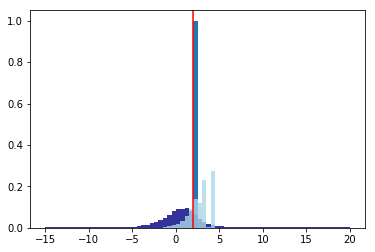

146430
4.3 3.80336


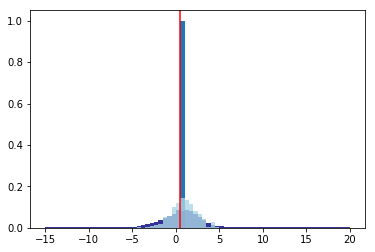

49493
0.9 2.75774


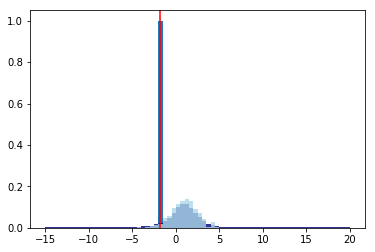

67465
7.4 6.4445


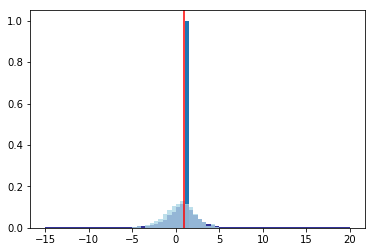

132167
11.7 13.4324


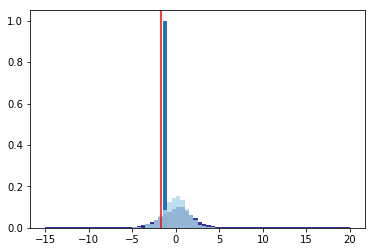

72286
10.5 10.3513


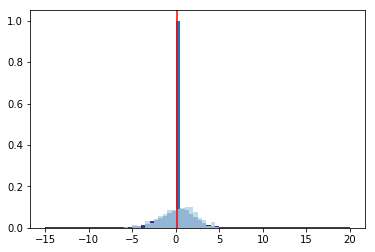

133893
13.1 14.2716


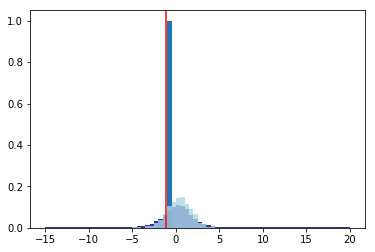

25253
0.5 0.162234


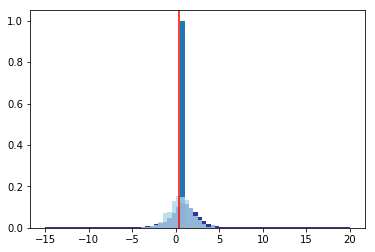

121419
18.9 18.6738


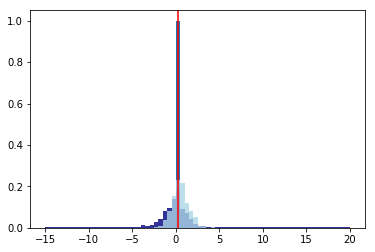

21629
-0.9 -1.11395


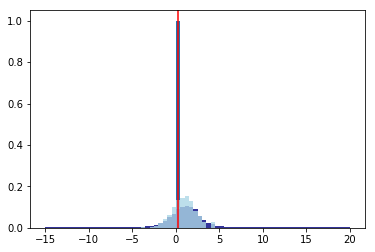

In [175]:
for i in np.random.randint(0, 182218, 10):
    print(i)
    print(test_set.targets[i], test_set.features[i, 0] * test_set.scale_factors[0])
    plt.bar(conv_bin_edges[:-1] + 0.25, preds_xgb[i], width=0.5, alpha=0.8, color='navy')
    plt.bar(conv_bin_edges[:-1] + 0.25, preds[i], width=0.5, alpha=0.8, color='lightblue')
    plt.bar(conv_bin_edges[:-1] + 0.25, conv_test_cat_targets_nearest[i], width=0.5, zorder=0.1)
    plt.axvline(test_conv_targets[i], c='r')
    plt.show()